### **`Caricamento in memoria e visualizzazione del dataset`**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [ ]:

df = pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### `Informazioni statistiche delle feature`

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### `Visualizzazione dei corpi idrici potabili e non potabili presenti nel dataset`

The percentage of waters that are potable is: 39.01%


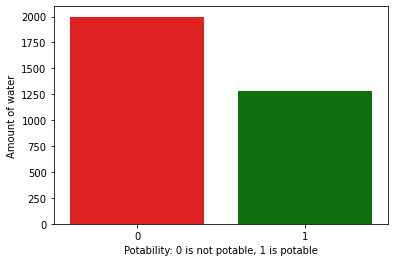

In [ ]:
sns.countplot(x="Potability",data=df, palette={0:'red', 1:'green'})
plt.xlabel('Potability: 0 is not potable, 1 is potable')
plt.ylabel('Amount of water')
porc = (len(df[df.Potability==1]) / len(df.Potability)) * 100
print('The percentage of waters that are potable is: {:.2f}%'.format(porc))

### `Funzioni di densità di probabilità delle feature`

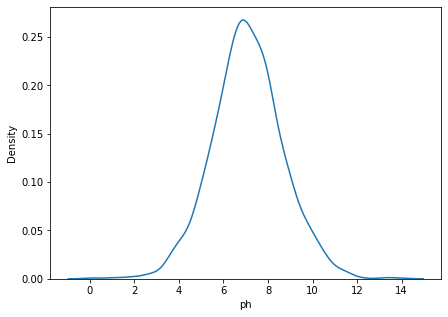

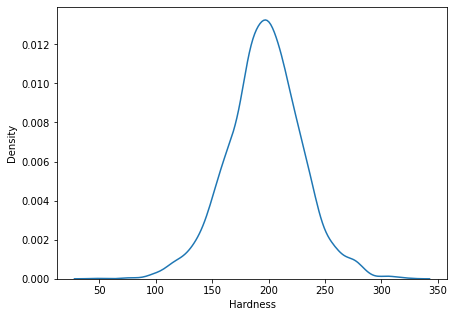

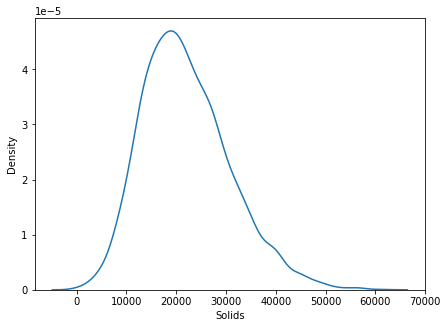

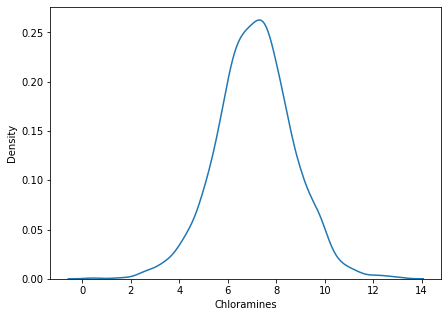

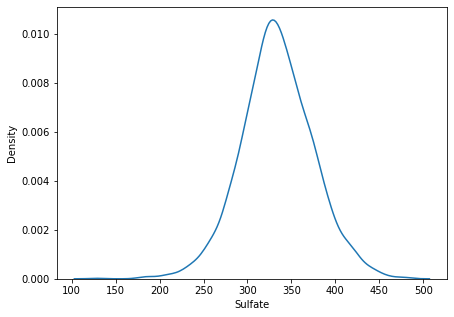

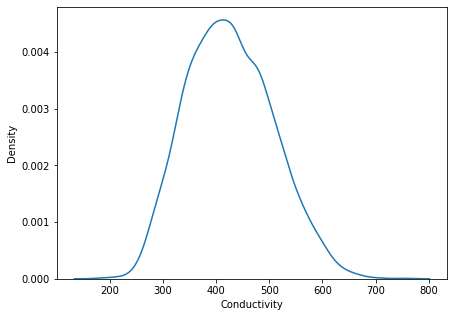

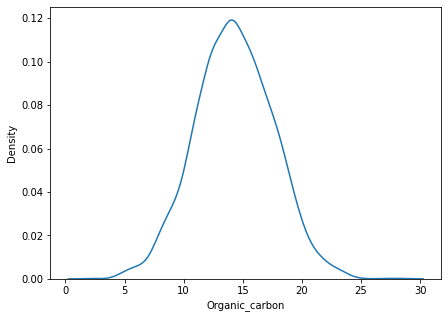

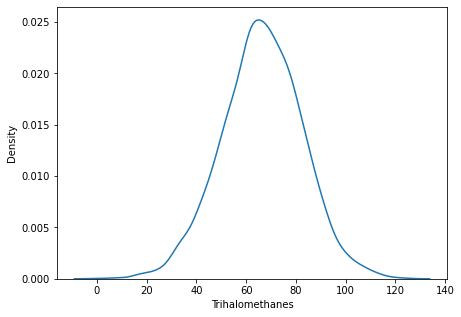

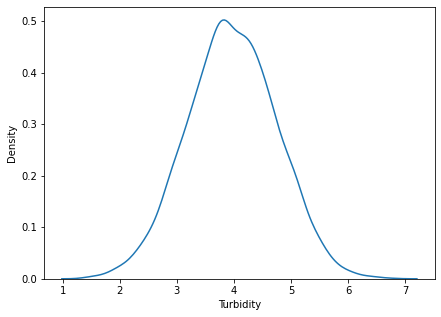

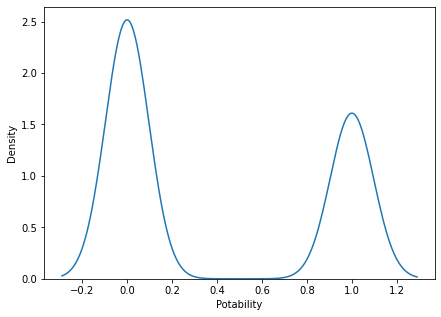

In [ ]:
# PLotting PDFs of all the numeric attributes in the dataset

df_num_final = df.select_dtypes(exclude="object") #solo le feature numeriche

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

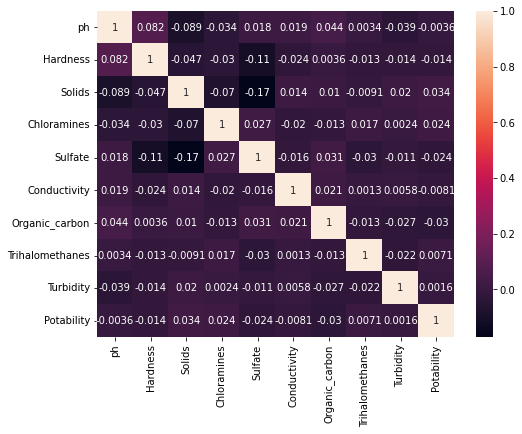

In [ ]:
#Correlation Matrix
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()


In [ ]:
#Print NaN Values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Standardizing The Data
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X = df.drop(['Potability'],axis=1)
X = sc.fit_transform(X)

In [ ]:
# Use KNN Imputer to impute NaN Values
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df[['ph','Sulfate','Trihalomethanes']] = imputer.fit_transform(df[['ph','Sulfate','Trihalomethanes']])


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**CLASSIFICAZIONE**











In [ ]:

# classification tools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# data preprocessors, metrics and evals
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# importing seaborn for plotting conf matrix
import seaborn as sns

In [ ]:
# Split the Dataset into Training and Test Datasets

from sklearn.model_selection import train_test_split

X = df.drop(['Potability'],axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

**Decision Tree Classifier**

Training Score :  1.0
Accuracy score :  0.5792682926829268
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       400
           1       0.46      0.44      0.45       256

    accuracy                           0.58       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.58      0.58      0.58       656



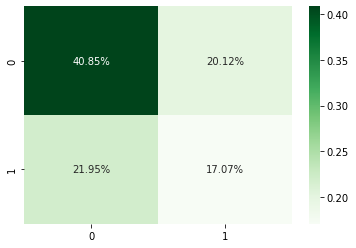

In [ ]:
# Model object
dt = DecisionTreeClassifier()

# Training Model
dt.fit(X_train,y_train)
dt_score = dt.score(X_train,y_train)
print("Training Score : ", dt_score)
# Making Prediction
pred_dt = dt.predict(X_test)

# Calculating Accuracy Score
dt_test_score = accuracy_score(y_test, pred_dt)
print("Accuracy score : ",dt_test_score)

# Classification Report
print(classification_report(y_test,pred_dt))

# Confusion Maxtrix
conf_mat_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat_dt/np.sum(conf_mat_dt), annot = True, fmt=  '0.2%', cmap = 'Greens')



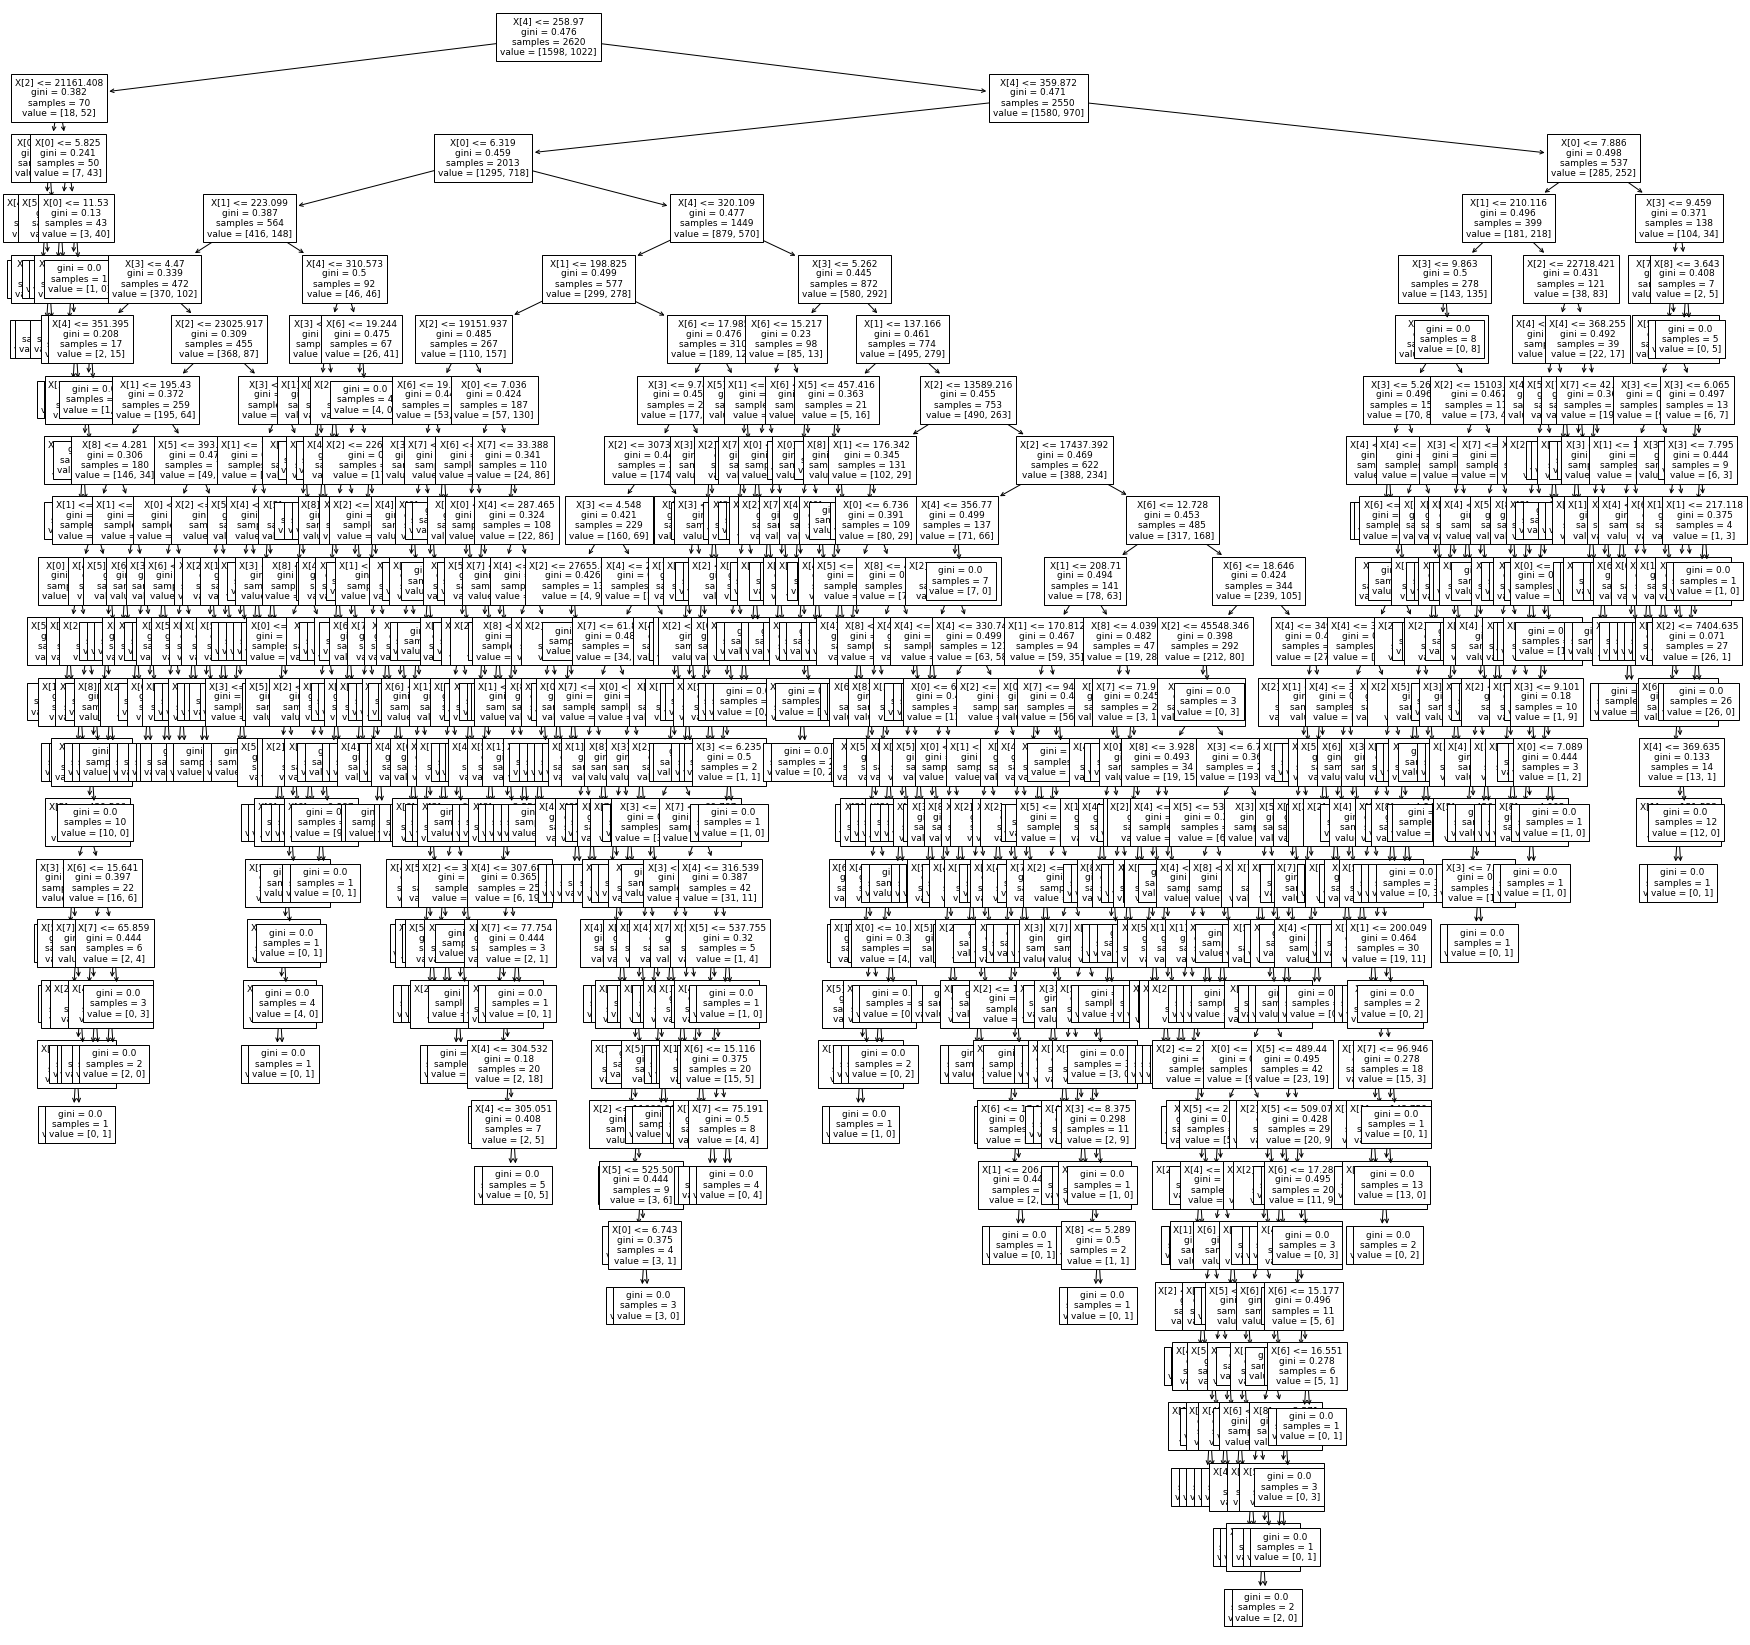

In [ ]:
#print decision tree
plt.figure(figsize=(30,30))
tree.plot_tree(dt,fontsize=9)
plt.show()

**Logistic Regression**

Training score for mean :  0.6099236641221374
Accuracy score for mean:  0.6097560975609756
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       1.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.80      0.50      0.38       656
weighted avg       0.76      0.61      0.46       656



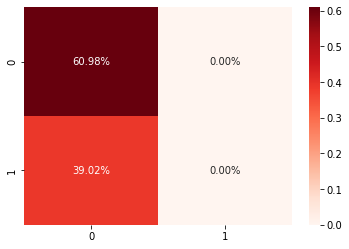

In [ ]:
import matplotlib.pyplot as plt

# training 
lr = LogisticRegression(max_iter=200,random_state=42, n_jobs=20)
lr.fit(X_train,y_train)
logistic_score = lr.score(X_train,y_train)

print("Training score : ", logistic_score)

# Making Prediction
pred_lr = lr.predict(X_test)
lg = accuracy_score(y_test, pred_lr)
print("Accuracy score : ", lg)

# classification report for Log Reg
print(classification_report(y_test,pred_lr,zero_division=True))

# confusion Maxtrix
conf_mat_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(conf_mat_lr/np.sum(conf_mat_lr), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 930 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1622 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2470 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3531 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4766 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 11.5min finished


In [ ]:
print(" ",best_clf.best_estimator_)
print (f'Training score : {best_clf.score(X,y):.3f}')
best_clf_predict=best_clf.predict(X_test)
best_clf_test_score = accuracy_score(y_test, best_clf_predict)
print("Accuracy score : ",best_clf_test_score)


  LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Training score : 0.610
Accuracy score :  0.6097560975609756


**Random Forest Classifier**

Training Score :  0.8759541984732825
Accuracy score :  0.6798780487804879
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       400
           1       0.73      0.29      0.41       256

    accuracy                           0.68       656
   macro avg       0.70      0.61      0.60       656
weighted avg       0.69      0.68      0.64       656



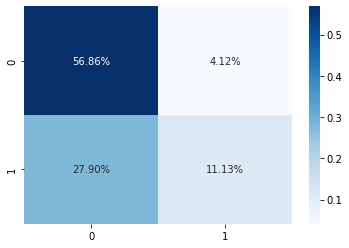

In [ ]:
# training 
rfc = RandomForestClassifier(n_estimators=1000,min_samples_leaf=9, random_state=42)
rfc.fit(X_train,y_train)
rfc_score = rfc.score(X_train,y_train)
print("Training Score : ",rfc_score)

#prediction
prediction_rfc = rfc.predict(X_test)
rfc_test_score = accuracy_score(y_test, prediction_rfc)
print("Accuracy score : ",rfc_test_score)


# Classification report
print(classification_report(y_test,prediction_rfc, zero_division=True))

# confusion Maxtrix
conf_mat_rfc = confusion_matrix(y_test, prediction_rfc)
sns.heatmap(conf_mat_rfc/np.sum(conf_mat_rfc), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.672515 using {'max_features': 'sqrt', 'n_estimators': 100}
0.620994 (0.004090) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.672515 (0.013200) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.667169 (0.015118) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.620611 (0.007490) with: {'max_features': 'log2', 'n_estimators': 10}
0.666409 (0.007698) with: {'max_features': 'log2', 'n_estimators': 100}
0.667553 (0.012326) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
grid_predict=grid_search.predict(X_test)
grid_test_score = accuracy_score(y_test, grid_predict)
print("Accuracy score : ",grid_test_score)
print (f'Training score - : {grid_result.score(X,y):.3f}')

Accuracy score :  0.6676829268292683
Training score - : 0.933


**Support Vector Machine**

Training Score :  0.6099236641221374
Accuracy score :  0.6097560975609756
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       1.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.80      0.50      0.38       656
weighted avg       0.76      0.61      0.46       656



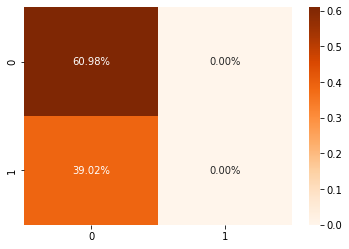

In [ ]:
# training 
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)
svc_score = svc.score(X_train,y_train)

print("Training Score : ",svc_score)

prediction_svc = svc.predict(X_test)
svc_test_score = accuracy_score(y_test, prediction_svc)
print("Accuracy score : ",svc_test_score)


# Classification report
print(classification_report(y_test,prediction_svc, zero_division=True))

# confusion Maxtrix
conf_mat_svc = confusion_matrix(y_test,prediction_svc)
sns.heatmap(conf_mat_svc/np.sum(conf_mat_svc), annot = True, fmt=  '0.2%', cmap = 'Oranges')

In [ ]:
# defining parameter range
svc= svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svc, param_grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
grid_predict=grid_search.predict(X_test)
grid_test_score = accuracy_score(y_test, grid_predict)
print("Accuracy score : ",grid_test_score)
print (f'Training score  : {grid.score(X,y):.3f}')

Best: 0.609924 using {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy score :  0.6676829268292683
Training score  : 0.610


**KNeighborsClassifier**

Training Score :  0.6156488549618321
Accuracy score :  0.6128048780487805
              precision    recall  f1-score   support

           0       0.62      0.97      0.75       400
           1       0.54      0.06      0.11       256

    accuracy                           0.61       656
   macro avg       0.58      0.51      0.43       656
weighted avg       0.58      0.61      0.50       656



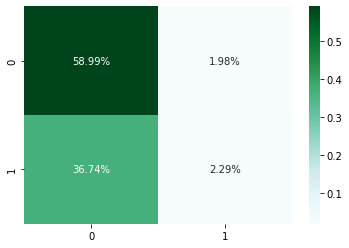

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model object 
knn = KNeighborsClassifier(n_neighbors=42, leaf_size=1800)

# Training Model
knn.fit(X_train, y_train)

# Training score
knn_score = knn.score(X_train,y_train)
print("Training Score : ",knn_score)

# Making Prediction
predict_knn = knn.predict(X_test)

knn_test_score = accuracy_score(y_test, predict_knn)
print("Accuracy score : ",knn_test_score)


# Classification report
print(classification_report(y_test,predict_knn, zero_division=True))

# confusion Maxtrix
conf_mat_knn = confusion_matrix(y_test,predict_knn)
sns.heatmap(conf_mat_knn/np.sum(conf_mat_knn), annot = True, fmt=  '0.2%', cmap = 'BuGn')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid =GridSearchCV(knn,grid_params, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
grid_predict=grid_search.predict(X_test)
grid_test_score = accuracy_score(y_test, grid_predict)
print("Accuracy score : ",grid_test_score)
print (f'Training score : {grid.score(X,y):.3f}')


Best: 0.585493 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Accuracy score :  0.6676829268292683
Training score : 0.921


**Gaussian NB**

Training Score :  0.6293893129770992
Accuracy score :  0.6173780487804879
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       400
           1       0.53      0.19      0.28       256

    accuracy                           0.62       656
   macro avg       0.58      0.54      0.51       656
weighted avg       0.59      0.62      0.56       656



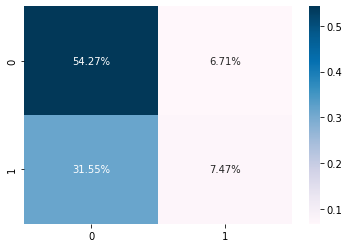

In [ ]:
# Model object 
gnb = GaussianNB()
# Training Model
gnb.fit(X_train, y_train)

# Training score
gnb_score = gnb.score(X_train,y_train)
print("Training Score : ",gnb_score)

# Making Prediction
predict_gnb = gnb.predict(X_test)

gnb_test_score = accuracy_score(y_test, predict_gnb)
print("Accuracy score : ",gnb_test_score)


# Classification report
print(classification_report(y_test,predict_gnb, zero_division=True))

# confusion Maxtrix
conf_mat_gnb = confusion_matrix(y_test,predict_gnb)
sns.heatmap(conf_mat_gnb/np.sum(conf_mat_gnb), annot = True, fmt=  '0.2%', cmap = 'PuBu')

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=3,
                 scoring='accuracy',
                 error_score=0) 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_
print("",gs_NB.best_params_)
gs_NB_predict=gs_NB.predict(X_test)
gs_NB_score = accuracy_score(y_test, gs_NB_predict)
print("Accuracy score : ",gs_NB_score)
print (f'Training score : {gs_NB.score(X,y):.3f}')


 {'var_smoothing': 1.519911082952933e-08}
Accuracy score :  0.6112804878048781
Training score : 0.625


**Gradient Boostin Classifier**

Training Score :  0.7530534351145038
Accuracy score :  0.6524390243902439
              precision    recall  f1-score   support

           0       0.66      0.91      0.76       400
           1       0.63      0.26      0.37       256

    accuracy                           0.65       656
   macro avg       0.65      0.58      0.56       656
weighted avg       0.65      0.65      0.61       656



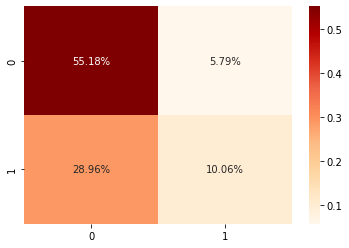

In [ ]:
# Model object 
gbm=GradientBoostingClassifier(random_state=42)

# Training Model
gbm.fit(X_train, y_train)

# Training score
gbm_score = gbm.score(X_train,y_train)
print("Training Score : ",gbm_score)

# Making Prediction
predict_gbm = gbm.predict(X_test)

gbm_test_score = accuracy_score(y_test, predict_gbm)
print("Accuracy score : ",gbm_test_score)


# Classification report
print(classification_report(y_test,predict_gbm, zero_division=True))

# confusion Maxtrix
conf_mat_gbm = confusion_matrix(y_test,predict_gbm)
sns.heatmap(conf_mat_gbm/np.sum(conf_mat_gbm), annot = True, fmt=  '0.2%', cmap = 'OrRd')

In [ ]:
# Parameters
gbm_params = {
    "n_estimators" : [5, 10, 25, 50,75, 100, 250, 500],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1,2]
}

# Model Object
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv=3, n_jobs=-1, verbose=2)

# Training

gbm_cv.fit(X_train,y_train)

gbm_cv.best_params_
print("Best: %f using %s" % (gbm_cv.best_score_, gbm_cv.best_params_))
gbm_cv_predict=gbm_cv.predict(X_test)
gbm_cv_test_score = accuracy_score(y_test, gbm_cv_predict)
print("Accuracy score : ",gbm_cv_test_score)
print (f'Training score  : {gbm_cv.score(X,y):.3f}')


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  4.0min finished


Best: 0.654198 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 25}
Accuracy score :  0.6707317073170732
Training score  : 0.737


**Multi-Layer Perceptron**

Training Score :  0.6114503816793894
Accuracy score :  0.6097560975609756
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       1.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.80      0.50      0.38       656
weighted avg       0.76      0.61      0.46       656



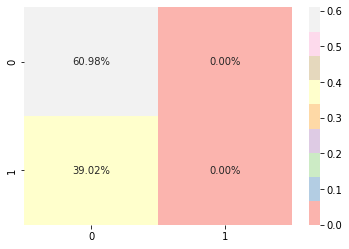

In [ ]:
#ARTIFICIAL NEURAL NETWORK

# Model Multi-Layer Perceptron
mlp=MLPClassifier(hidden_layer_sizes=80, max_iter=1600)
# Train
mlp.fit(X_train,y_train)

# Training score
mlp_score =mlp.score(X_train,y_train)
print("Training Score : ",mlp_score)


mlp_pred = mlp.predict(X_test)


mlp_test_score = accuracy_score(y_test, mlp_pred)
print("Accuracy score : ",mlp_test_score)


# Classification report
print(classification_report(y_test, mlp_pred, zero_division=True))

# confusion Maxtrix
conf_mat_mlp = confusion_matrix(y_test, mlp_pred)
sns.heatmap(conf_mat_mlp/np.sum(conf_mat_mlp), annot = True, fmt=  '0.2%', cmap = 'Pastel1')

In [ ]:
mlp= MLPClassifier(max_iter=1600)
grid_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid =GridSearchCV(mlp,grid_params, n_jobs=-1, cv=3, scoring='accuracy',error_score=0,verbose=1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
grid_predict=grid_search.predict(X_test)
grid_test_score = accuracy_score(y_test, grid_predict)
print("Accuracy score : ",grid_test_score)
print (f'Training score : {grid.score(X,y):.3f}')

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.4s


Best: 0.611451 using {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Accuracy score :  0.6676829268292683
Training score : 0.611


[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   58.5s finished


**Adaboost**

Training score for mean:  0.6599236641221374
Accuracy score for mean:  0.600609756097561
              precision    recall  f1-score   support

           0       0.63      0.85      0.72       400
           1       0.47      0.21      0.29       256

    accuracy                           0.60       656
   macro avg       0.55      0.53      0.51       656
weighted avg       0.57      0.60      0.55       656



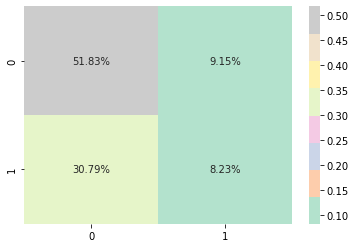

In [ ]:
# ADABOOST
from sklearn.ensemble import AdaBoostClassifier

# Creating adaboost classifier model
adb = AdaBoostClassifier(random_state=42)
adb_model = adb.fit(X_train,y_train)
adb_score=adb.score(X_train,y_train)
print("Training score for mean: ", adb_score)

pred_adb= adb.predict(X_test)
lg = accuracy_score(y_test, pred_adb)
print("Accuracy score for mean: ", lg)

# classification report for Adb
print(classification_report(y_test,pred_adb))

# confusion Maxtrix
conf_mat_adb = confusion_matrix(y_test, pred_adb)
sns.heatmap(conf_mat_adb/np.sum(conf_mat_adb), annot = True, fmt=  '0.2%', cmap = 'Pastel2')


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}


grid =GridSearchCV(adb,parameters, n_jobs=-1, cv=3, scoring='accuracy',error_score=0,verbose=1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
grid_predict=grid_search.predict(X_test)
grid_test_score = accuracy_score(y_test, grid_predict)
print("Accuracy score : ",grid_test_score)
print (f'Training score : {grid.score(X,y):.3f}')

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 11.7min finished


Best: 0.653049 using {'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.01, 'n_estimators': 250}
Accuracy score :  0.6676829268292683
Training score : 0.927


**XGB**

Training Score :  0.7343511450381679
Accuracy score :  0.6585365853658537
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       400
           1       0.69      0.23      0.35       256

    accuracy                           0.66       656
   macro avg       0.67      0.58      0.56       656
weighted avg       0.67      0.66      0.60       656



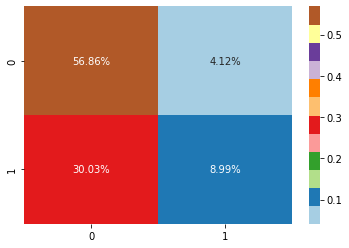

In [ ]:
# Model
xgb_model = XGBClassifier(eval_metric="rmse",use_label_encoder=False)
# Train
xgb_model.fit(X_train,y_train)

# Training score
xgb_score = xgb_model.score(X_train,y_train)
print("Training Score : ",xgb_score)


xgb_pred = xgb_model.predict(X_test)


xgb_test_score = accuracy_score(y_test, xgb_pred)
print("Accuracy score : ",xgb_test_score)


# Classification report
print(classification_report(y_test, xgb_pred, zero_division=True))

# confusion Maxtrix
conf_mat_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_mat_xgb/np.sum(conf_mat_xgb), annot = True, fmt=  '0.2%', cmap = 'Paired')

In [ ]:
xgb_params={"n_estimators":[100,500,1000],
           "max_depth":[3,6,10],
           "learning_rate":[0.01,0.05,0.1]
           }

xgb_model=XGBClassifier(eval_metric="rmse")
xgb_cv_model=GridSearchCV(xgb_model,xgb_params,n_jobs=-1,verbose=2,cv=3, scoring='accuracy',error_score=0)
xgb_cv_model.fit(X_train,y_train)

xgb_cv_model.best_params_

xgb_cv_model.best_params_
print("Best: %f using %s" % (xgb_cv_model.best_score_, xgb_cv_model.best_params_))
xgb_cv_predict=xgb_cv_model.predict(X_test)
xgb_cv_test_score = accuracy_score(y_test, xgb_cv_predict)
print("Accuracy score : ",xgb_cv_test_score)
print (f'Training score  : {xgb_cv_model.score(X,y):.3f}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.7min finished


Best: 0.661444 using {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}
Accuracy score :  0.663109756097561
Training score  : 0.792


**Light gbm**

Training Score :  0.9595419847328245
Accuracy score :  0.6707317073170732
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       400
           1       0.62      0.39      0.48       256

    accuracy                           0.67       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.66      0.67      0.65       656



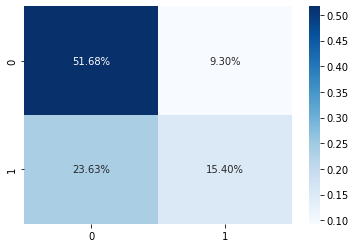

In [ ]:
# Model
lightgbm_model = LGBMClassifier()
# Train
lightgbm_model.fit(X_train,y_train)

# Training score
lightgbm_score = lightgbm_model.score(X_train,y_train)
print("Training Score : ",lightgbm_score)


lightgbm_pred = lightgbm_model.predict(X_test)


lightgbm_test_score = accuracy_score(y_test, lightgbm_pred)
print("Accuracy score : ",lightgbm_test_score)


# Classification report
print(classification_report(y_test, lightgbm_pred, zero_division=True))

# confusion Maxtrix
conf_mat_lightgbm = confusion_matrix(y_test, lightgbm_pred)
sns.heatmap(conf_mat_lightgbm/np.sum(conf_mat_lightgbm), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [ ]:
lightgbm_params = {"n_estimators":[90,450,900],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6,9],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_child_samples":[5,9,10,20]}

lightgbm_model = LGBMClassifier()
lightgbm_cv_model = GridSearchCV(lightgbm_model,lightgbm_params,cv=3,n_jobs=-1,verbose=2,scoring='accuracy',error_score=0)
lightgbm_cv_model.fit(X_train,y_train)
lightgbm_cv_model.best_params_
print("Best: %f using %s" % (lightgbm_cv_model.best_score_, lightgbm_cv_model.best_params_))
lightgbm_cv_predict=lightgbm_cv_model.predict(X_test)
lightgbm_cv_test_score = accuracy_score(y_test, lightgbm_cv_predict)
print("Accuracy score : ",lightgbm_cv_test_score)
print (f'Training score  : {lightgbm_cv_model.score(X,y):.3f}')

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 14.4min finished


Best: 0.662208 using {'learning_rate': 0.01, 'max_depth': 6, 'min_child_samples': 5, 'n_estimators': 900, 'subsample': 0.6}
Accuracy score :  0.6783536585365854
Training score  : 0.860


**Confronto dei modelli**

  DecisionTreeClassifier 1.0 0.5685975609756098
  LogisticRegression 0.6099236641221374 0.6097560975609756
  RandomForestClassifier 1.0 0.6692073170731707
  SVC 0.6099236641221374 0.6097560975609756
  KNeighborsClassifier 1.0 0.6036585365853658
  GaussianNB 0.6278625954198473 0.6112804878048781
  GradientBoostingClassifier 0.7538167938931297 0.6692073170731707
  MLPClassifier 0.6114503816793894 0.6097560975609756
  AdaBoostClassifier 0.6599236641221374 0.600609756097561
  XGBClassifier 0.8248091603053435 0.663109756097561
  LGBMClassifier 0.9049618320610687 0.6783536585365854


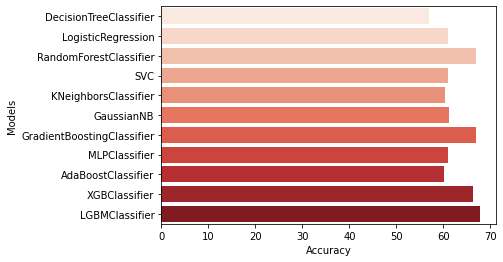

In [ ]:
models=[ DecisionTreeClassifier(),
         LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False
),
         RandomForestClassifier(max_features='sqrt', n_estimators=100),
         svm.SVC(C=0.1, gamma=1, kernel='rbf'),
         KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights= 'distance'),
         GaussianNB(var_smoothing=1.519911082952933e-08),
         GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=25),
         MLPClassifier(activation='relu', alpha=0.05, hidden_layer_sizes=100, learning_rate='constant', solver='sgd'),
         AdaBoostClassifier(),
         XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=100),
         LGBMClassifier(learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=900, subsample=0.6)
         ]


result=[]

results=pd.DataFrame(columns=["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    fit = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score= model.score(X_train,y_train)
    accuracy = accuracy_score(y_test, prediction)
    result = pd.DataFrame([[names,accuracy*100]],columns=["Models","Accuracy"])
    results = results.append(result)
    result_score=pd.DataFrame([[names,score]],columns=["Models","Score"])
    results_score = results.append(result_score)
    print(" ",names,score,accuracy)
    
# results = results.sort_values('Accuracy').reset_index()

sns.barplot(x="Accuracy",y="Models",data=results,palette='Reds')


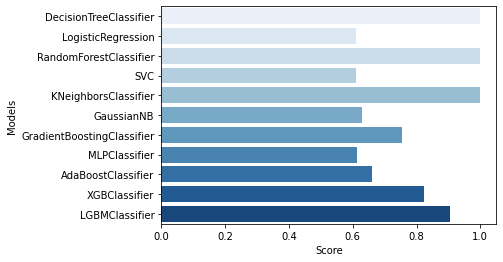

In [ ]:
models=[ DecisionTreeClassifier(),
         LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False
),
         RandomForestClassifier(max_features='sqrt', n_estimators=100),
         svm.SVC(C=0.1, gamma=1, kernel='rbf'),
         KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights= 'distance'),
         GaussianNB(var_smoothing=1.519911082952933e-08),
         GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=25),
         MLPClassifier(activation='relu', alpha=0.05, hidden_layer_sizes=100, learning_rate='constant', solver='sgd'),
         AdaBoostClassifier(),
         XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=100),
         LGBMClassifier(learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=900, subsample=0.6)
         ]


result=[]

results=pd.DataFrame(columns=["Models","Score"])

for model in models:
    names = model.__class__.__name__
    fit = model.fit(X_train, y_train)
    score= model.score(X_train,y_train)
    result = pd.DataFrame([[names,score]],columns=["Models","Score"])
    results = results.append(result)
    
# results = results.sort_values('Accuracy').reset_index()

sns.barplot(x="Score",y="Models",data=results,palette='Blues')

### `Il modello Random Fores è risultato il più performante dopo aver sintonizzato gli iperparametri. `